NVDA Data:
         Date      Open      High       Low     Close  Adj Close     Volume
0  2005-01-03  2.031667  2.060000  1.956667  1.965000   1.802499  106671600
1  2005-01-04  1.979167  1.982500  1.842500  1.872500   1.717649   79022400
2  2005-01-05  1.852500  1.912500  1.842500  1.890000   1.733701   72481200
3  2005-01-06  1.923333  1.945833  1.858333  1.871667   1.716884   56356800
4  2005-01-07  1.875833  1.890000  1.808333  1.835833   1.684013   76309200

QQQ Data:
         Date       Open       High        Low      Close  Adj Close  \
0  2005-01-03  40.090000  40.290001  39.369999  39.500000  34.022541   
1  2005-01-04  39.669998  39.740002  38.549999  38.779999  33.402367   
2  2005-01-05  38.680000  38.959999  38.470001  38.540001  33.195671   
3  2005-01-06  38.630001  38.709999  38.340000  38.349998  33.032017   
4  2005-01-07  38.560001  38.869999  38.209999  38.549999  33.204266   

      Volume  
0  100970900  
1  136623200  
2  127925500  
3  102934600  
4  123104000  

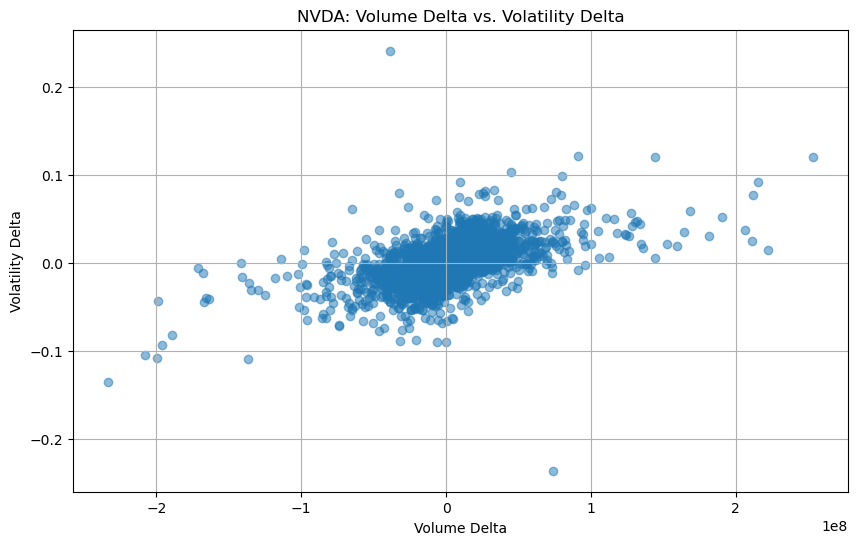

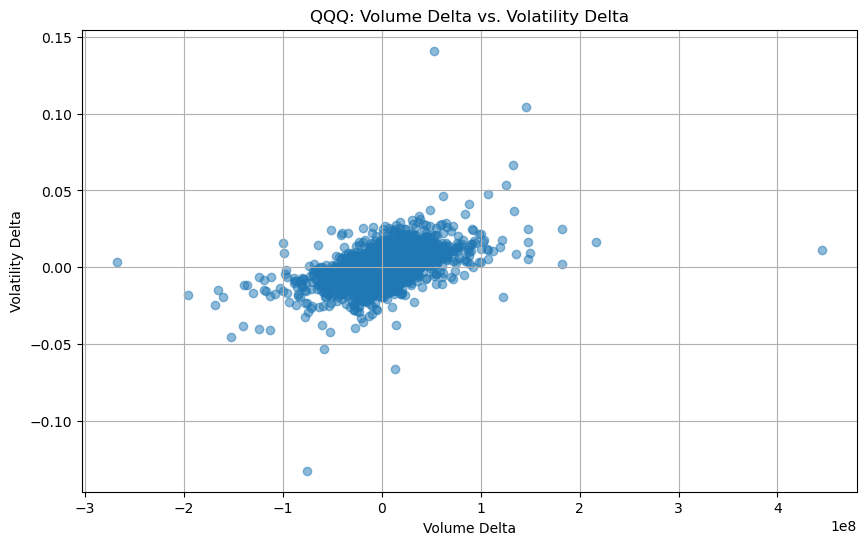

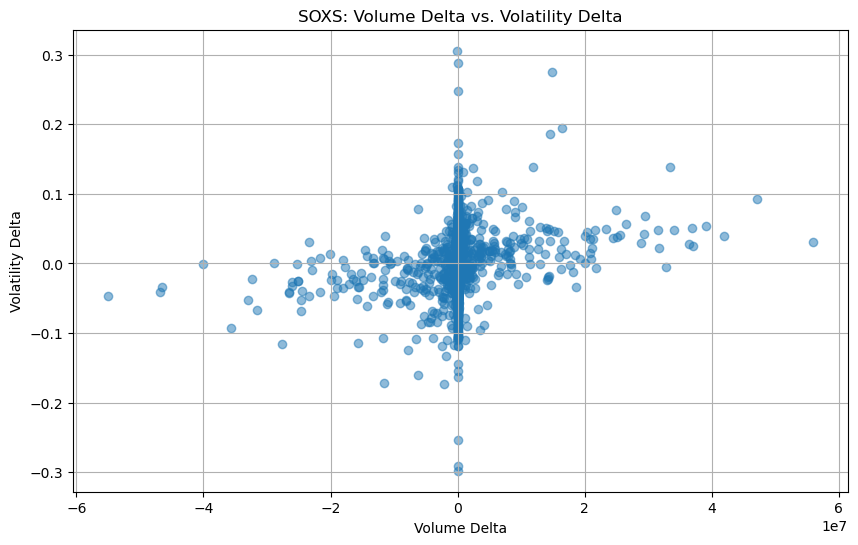

Optimal Parameters (a, b): [ 3.87176928e-10 -2.46615730e-07]
Optimal Parameters (a, b): [ 1.72533481e-10 -6.92641277e-07]
Optimal Parameters (a, b): [ 1.63983349e-09 -2.81727061e-05]
Summary of Results:
NVDA: a = 0.00000, b = -0.00000
QQQ: a = 0.00000, b = -0.00000
SOXS: a = 0.00000, b = -0.00003


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data
nvda_data = pd.read_csv(r'C:\Users\janvi\Desktop\assessment\NVDA_2005_2023.csv')
qqq_data = pd.read_csv(r'C:\Users\janvi\Desktop\assessment\QQQ_2005_2023.csv')
soxs_data = pd.read_csv(r'C:\Users\janvi\Desktop\assessment\SOXS_2005_2023.csv')

# Display the first few rows to understand the structure
print("NVDA Data:")
print(nvda_data.head())
print("\nQQQ Data:")
print(qqq_data.head())
print("\nSOXS Data:")
print(soxs_data.head())

# Function to calculate intraday volatility and volume delta
def calculate_volatility_and_delta(data):
    data['Volatility'] = (data['High'] - data['Low']) / data['Close']
    data['Volume_delta'] = data['Volume'].diff()
    data['Volatility_delta'] = data['Volatility'].diff()
    return data

nvda_data = calculate_volatility_and_delta(nvda_data)
qqq_data = calculate_volatility_and_delta(qqq_data)
soxs_data = calculate_volatility_and_delta(soxs_data)

# Plot Volume Delta vs. Volatility Delta
def plot_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Volume_delta'], data['Volatility_delta'], alpha=0.5)
    plt.title(f'{title}: Volume Delta vs. Volatility Delta')
    plt.xlabel('Volume Delta')
    plt.ylabel('Volatility Delta')
    plt.grid(True)
    plt.show()

plot_data(nvda_data, 'NVDA')
plot_data(qqq_data, 'QQQ')
plot_data(soxs_data, 'SOXS')

# Hypothetical linear model: Volatility_delta = a * Volume_delta + b
def linear_model(x, a, b):
    return a * x + b

# Fitting the model to the data
def fit_model(data):
    x_data = data['Volume_delta'].dropna()
    y_data = data['Volatility_delta'].dropna()
    popt, _ = curve_fit(linear_model, x_data, y_data)
    print(f'Optimal Parameters (a, b): {popt}')
    return popt

nvda_params = fit_model(nvda_data)
qqq_params = fit_model(qqq_data)
soxs_params = fit_model(soxs_data)

# Summary of Results
print("Summary of Results:")
print(f"NVDA: a = {nvda_params[0]:.5f}, b = {nvda_params[1]:.5f}")
print(f"QQQ: a = {qqq_params[0]:.5f}, b = {qqq_params[1]:.5f}")
print(f"SOXS: a = {soxs_params[0]:.5f}, b = {soxs_params[1]:.5f}")


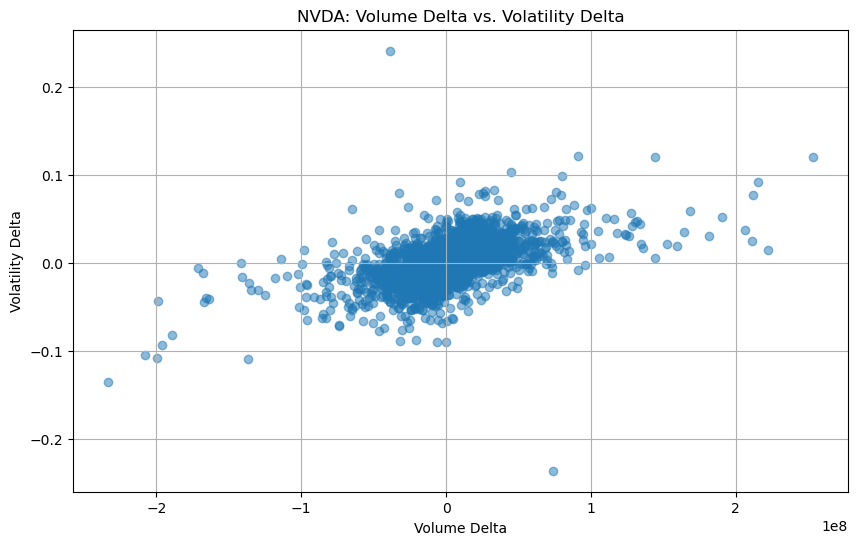

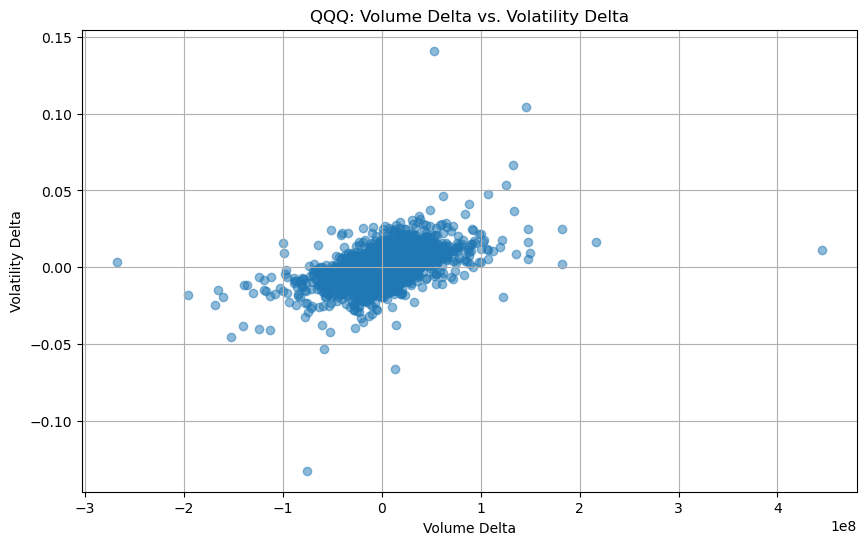

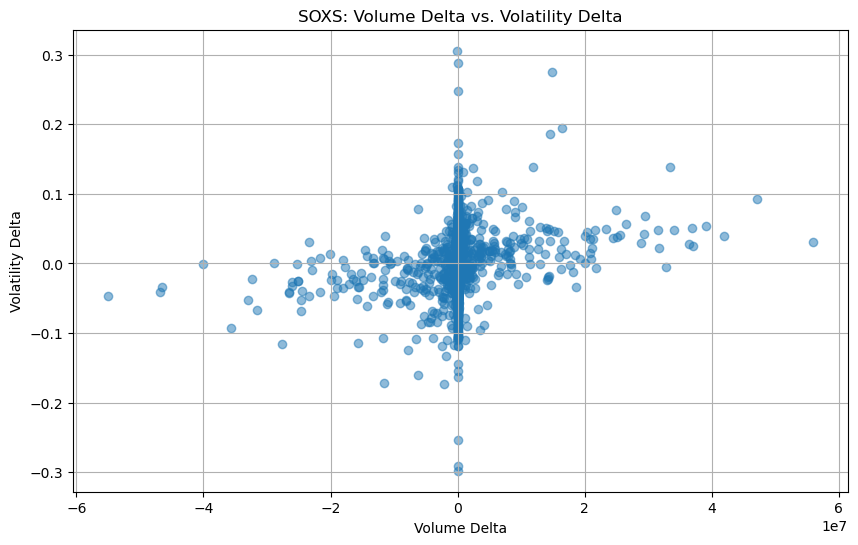

Optimal Parameters (a, b): [ 3.87176928e-10 -2.46615730e-07]
Optimal Parameters (a, b): [ 1.72533481e-10 -6.92641277e-07]
Optimal Parameters (a, b): [ 1.63983349e-09 -2.81727061e-05]

Summary of Results:
NVDA: a = 0.00000, b = -0.00000
QQQ: a = 0.00000, b = -0.00000
SOXS: a = 0.00000, b = -0.00003


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data with date parsing
def load_data(filename):
    data = pd.read_csv(filename, parse_dates=['Date'])
    data = data.sort_values('Date')  # Ensure chronological order
    return data

nvda_data = pd.read_csv(r'C:\Users\janvi\Desktop\assessment\NVDA_2005_2023.csv')
qqq_data = pd.read_csv(r'C:\Users\janvi\Desktop\assessment\QQQ_2005_2023.csv')
soxs_data = pd.read_csv(r'C:\Users\janvi\Desktop\assessment\SOXS_2005_2023.csv')

# Function to calculate intraday volatility and volume delta
def calculate_volatility_and_delta(data):
    required_cols = {'High', 'Low', 'Close', 'Volume'}
    
    if not required_cols.issubset(data.columns):
        raise ValueError(f"Missing required columns in dataset: {required_cols - set(data.columns)}")
    
    data['Volatility'] = (data['High'] - data['Low']) / data['Close']
    data['Volume_delta'] = data['Volume'].diff()
    data['Volatility_delta'] = data['Volatility'].diff()
    
    # Drop NaN values from first difference calculation
    data = data.dropna()
    
    return data

nvda_data = calculate_volatility_and_delta(nvda_data)
qqq_data = calculate_volatility_and_delta(qqq_data)
soxs_data = calculate_volatility_and_delta(soxs_data)

# Plot Volume Delta vs. Volatility Delta
def plot_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Volume_delta'], data['Volatility_delta'], alpha=0.5)
    plt.title(f'{title}: Volume Delta vs. Volatility Delta')
    plt.xlabel('Volume Delta')
    plt.ylabel('Volatility Delta')
    plt.grid(True)
    plt.show()

plot_data(nvda_data, 'NVDA')
plot_data(qqq_data, 'QQQ')
plot_data(soxs_data, 'SOXS')

# Hypothetical linear model: Volatility_delta = a * Volume_delta + b
def linear_model(x, a, b):
    return a * x + b

# Fitting the model to the data
def fit_model(data):
    x_data = data['Volume_delta'].dropna()
    y_data = data['Volatility_delta'].dropna()

    if len(x_data) < 2:  # Ensure enough data points for fitting
        print("Not enough data to fit the model.")
        return None

    try:
        popt, _ = curve_fit(linear_model, x_data, y_data)
        print(f'Optimal Parameters (a, b): {popt}')
        return popt
    except Exception as e:
        print(f"Curve fitting failed: {e}")
        return None

nvda_params = fit_model(nvda_data)
qqq_params = fit_model(qqq_data)
soxs_params = fit_model(soxs_data)

# Summary of Results
print("\nSummary of Results:")
if nvda_params is not None:
    print(f"NVDA: a = {nvda_params[0]:.5f}, b = {nvda_params[1]:.5f}")
if qqq_params is not None:
    print(f"QQQ: a = {qqq_params[0]:.5f}, b = {qqq_params[1]:.5f}")
if soxs_params is not None:
    print(f"SOXS: a = {soxs_params[0]:.5f}, b = {soxs_params[1]:.5f}")


Data loaded successfully from C:\Users\sunee\Desktop\Kausal\NVDA_2005_2023.csv
Data loaded successfully from C:\Users\sunee\Desktop\Kausal\QQQ_2005_2023.csv
Data loaded successfully from C:\Users\sunee\Desktop\Kausal\SOXS_2005_2023.csv


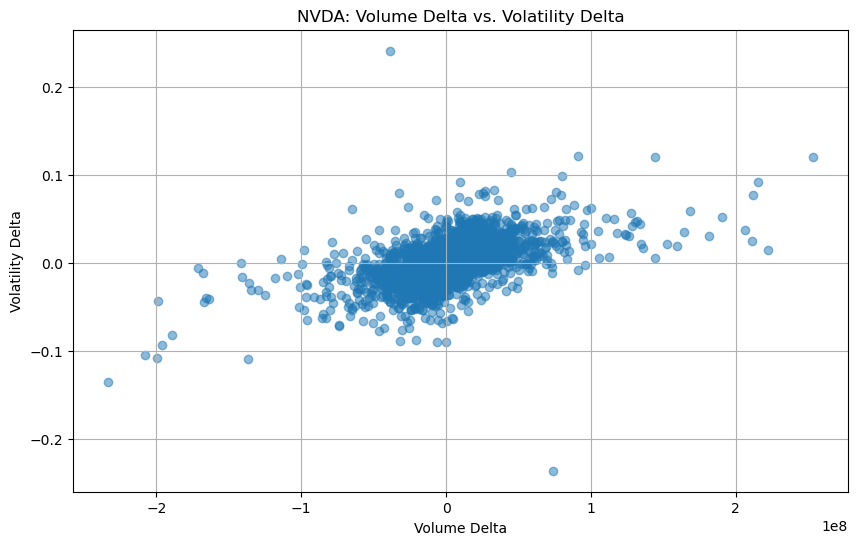

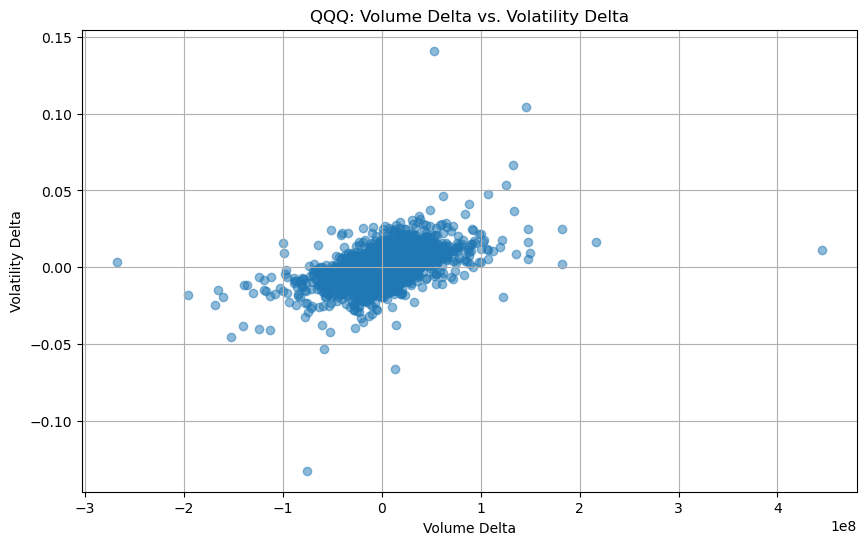

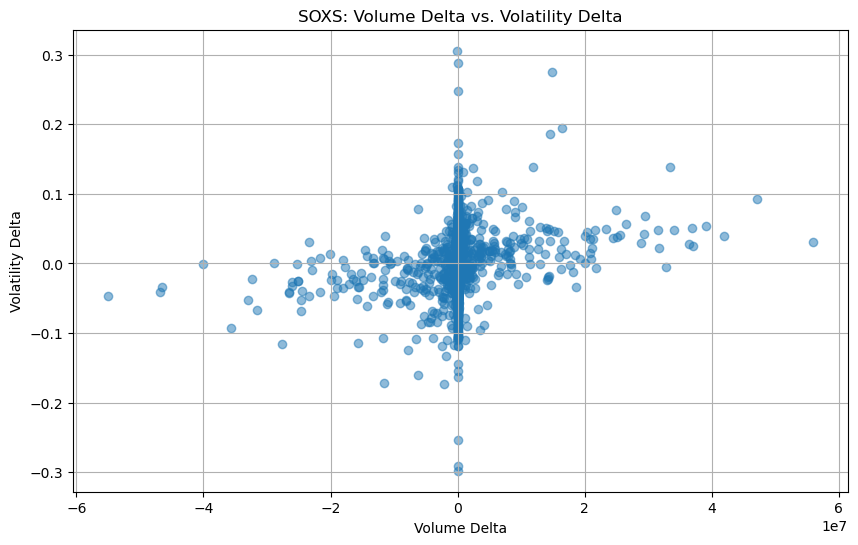

Optimal Parameters (a, b) for model: [ 3.87176928e-10 -2.46615730e-07]
Optimal Parameters (a, b) for model: [ 1.72533481e-10 -6.92641277e-07]
Optimal Parameters (a, b) for model: [ 1.63983349e-09 -2.81727061e-05]

Summary of Results:
NVDA: a = 0.00000, b = -0.00000
QQQ: a = 0.00000, b = -0.00000
SOXS: a = 0.00000, b = -0.00003


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data with date parsing and sorting
def load_data(filename):
    try:
        data = pd.read_csv(filename, parse_dates=['Date'])
        data = data.sort_values('Date')  # Ensure data is chronological
        print(f"Data loaded successfully from {filename}")
        return data
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return None

nvda_data = load_data(r'C:\Users\janvi\Desktop\assessment\NVDA_2005_2023.csv')
qqq_data = load_data(r'C:\Users\janvi\Desktop\assessment\QQQ_2005_2023.csv')
soxs_data = load_data(r'C:\Users\janvi\Desktop\assessment\SOXS_2005_2023.csv')

# Function to calculate intraday volatility and volume delta
def calculate_volatility_and_delta(data):
    required_cols = {'High', 'Low', 'Close', 'Volume'}
    
    if not required_cols.issubset(data.columns):
        raise ValueError(f"Missing required columns: {required_cols - set(data.columns)}")
    
    data['Volatility'] = (data['High'] - data['Low']) / data['Close']
    data['Volume_delta'] = data['Volume'].diff()
    data['Volatility_delta'] = data['Volatility'].diff()
    data = data.dropna()  # Remove NaN values
    return data

if nvda_data is not None:
    nvda_data = calculate_volatility_and_delta(nvda_data)
if qqq_data is not None:
    qqq_data = calculate_volatility_and_delta(qqq_data)
if soxs_data is not None:
    soxs_data = calculate_volatility_and_delta(soxs_data)

# Plot Volume Delta vs. Volatility Delta
def plot_data(data, title):
    if data is None or data.empty:
        print(f"No data available to plot for {title}")
        return
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Volume_delta'], data['Volatility_delta'], alpha=0.5)
    plt.title(f'{title}: Volume Delta vs. Volatility Delta')
    plt.xlabel('Volume Delta')
    plt.ylabel('Volatility Delta')
    plt.grid(True)
    plt.show()

plot_data(nvda_data, 'NVDA')
plot_data(qqq_data, 'QQQ')
plot_data(soxs_data, 'SOXS')

# Hypothetical linear model: Volatility_delta = a * Volume_delta + b
def linear_model(x, a, b):
    return a * x + b

# Fitting the model to the data
def fit_model(data):
    if data is None or data.empty:
        print("No data available to fit the model.")
        return None

    x_data = data['Volume_delta'].dropna()
    y_data = data['Volatility_delta'].dropna()

    if len(x_data) < 2:
        print("Not enough data points for fitting.")
        return None

    try:
        popt, _ = curve_fit(linear_model, x_data, y_data)
        print(f'Optimal Parameters (a, b) for model: {popt}')
        return popt
    except Exception as e:
        print(f"Curve fitting failed: {e}")
        return None

nvda_params = fit_model(nvda_data)
qqq_params = fit_model(qqq_data)
soxs_params = fit_model(soxs_data)

# Summary of Results
print("\nSummary of Results:")
if nvda_params is not None:
    print(f"NVDA: a = {nvda_params[0]:.5f}, b = {nvda_params[1]:.5f}")
if qqq_params is not None:
    print(f"QQQ: a = {qqq_params[0]:.5f}, b = {qqq_params[1]:.5f}")
if soxs_params is not None:
    print(f"SOXS: a = {soxs_params[0]:.5f}, b = {soxs_params[1]:.5f}")


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

# Load the data
def load_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['Date'])
    data = data.sort_values('Date')
    return data

nvda_data = load_data(r'C:\Users\janvi\Desktop\assessment\NVDA_2005_2023.csv')
qqq_data = load_data(r'C:\Users\janvi\Desktop\assessment\QQQ_2005_2023.csv')
soxs_data = load_data(r'C:\Users\janvi\Desktop\assessment\SOXS_2005_2023.csv')

print("NVDA Data Sample:\n", nvda_data.head())


NVDA Data Sample:
         Date      Open      High       Low     Close  Adj Close     Volume
0 2005-01-03  2.031667  2.060000  1.956667  1.965000   1.802499  106671600
1 2005-01-04  1.979167  1.982500  1.842500  1.872500   1.717649   79022400
2 2005-01-05  1.852500  1.912500  1.842500  1.890000   1.733701   72481200
3 2005-01-06  1.923333  1.945833  1.858333  1.871667   1.716884   56356800
4 2005-01-07  1.875833  1.890000  1.808333  1.835833   1.684013   76309200


In [36]:
def calculate_volatility_and_delta(data):
    data['Volatility'] = (data['High'] - data['Low']) / data['Close']
    data['Volume_delta'] = data['Volume'].diff()
    data['Volatility_delta'] = data['Volatility'].diff()
    data = data.dropna()
    return data


In [37]:
nvda_data = calculate_volatility_and_delta(nvda_data)

In [38]:
nvda_data

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta
2,2005-01-05,1.852500,1.912500,1.842500,1.890000,1.733701,72481200,0.037037,-6541200.0,-0.037729
3,2005-01-06,1.923333,1.945833,1.858333,1.871667,1.716884,56356800,0.046750,-16124400.0,0.009713
4,2005-01-07,1.875833,1.890000,1.808333,1.835833,1.684013,76309200,0.044485,19952400.0,-0.002265
5,2005-01-10,1.841667,1.858333,1.829167,1.840000,1.687836,57955200,0.015851,-18354000.0,-0.028634
6,2005-01-11,1.822500,1.832500,1.755833,1.783333,1.635855,109338000,0.042991,51382800.0,0.027140
...,...,...,...,...,...,...,...,...,...,...
4776,2023-12-22,491.950012,493.829987,484.670013,488.299988,488.277069,25213900,0.018759,-4828600.0,0.004960
4777,2023-12-26,489.679993,496.000000,489.600006,492.790009,492.766907,24420000,0.012987,-793900.0,-0.005772
4778,2023-12-27,495.109985,496.799988,490.850006,494.170013,494.146820,23364800,0.012040,-1055200.0,-0.000947
4779,2023-12-28,496.429993,498.839996,494.119995,495.220001,495.196777,24658700,0.009531,1293900.0,-0.002509


In [39]:
qqq_data = calculate_volatility_and_delta(qqq_data)


In [40]:
qqq_data

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta
2,2005-01-05,38.680000,38.959999,38.470001,38.540001,33.195671,127925500,0.012714,-8697700.0,-0.017972
3,2005-01-06,38.630001,38.709999,38.340000,38.349998,33.032017,102934600,0.009648,-24990900.0,-0.003066
4,2005-01-07,38.560001,38.869999,38.209999,38.549999,33.204266,123104000,0.017121,20169400.0,0.007473
5,2005-01-10,38.439999,38.869999,38.389999,38.529999,33.187061,88764200,0.012458,-34339800.0,-0.004663
6,2005-01-11,38.369999,38.500000,38.070000,38.259998,32.954479,106398800,0.011239,17634600.0,-0.001219
...,...,...,...,...,...,...,...,...,...,...
4776,2023-12-22,409.000000,409.970001,406.480011,408.380005,407.626312,34292400,0.008546,-11276500.0,-0.000454
4777,2023-12-26,409.250000,411.559998,409.149994,410.880005,410.121704,22722500,0.005865,-11569900.0,-0.002680
4778,2023-12-27,410.950012,411.790009,410.079987,411.500000,410.956604,31980500,0.004156,9258000.0,-0.001710
4779,2023-12-28,412.670013,412.920013,410.940002,411.299988,410.756836,27029200,0.004814,-4951300.0,0.000658


In [41]:

soxs_data = calculate_volatility_and_delta(soxs_data)

In [42]:
soxs_data

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta
2,2010-03-15,20294400.00,20558400.00,20145600.00,20448000.00,17982738.00,0,0.020188,0.0,-0.018002
3,2010-03-16,19080000.00,19080000.00,18782400.00,18782400.00,16517945.00,0,0.015845,0.0,-0.004343
4,2010-03-17,18782400.00,18782400.00,18782400.00,18782400.00,16517945.00,0,0.000000,0.0,-0.015845
5,2010-03-18,18782400.00,18782400.00,18782400.00,18782400.00,16517945.00,0,0.000000,0.0,0.000000
6,2010-03-19,19569600.00,19593600.00,19569600.00,19593600.00,17231342.00,0,0.001225,0.0,0.001225
...,...,...,...,...,...,...,...,...,...,...
3471,2023-12-22,5.97,6.12,5.87,5.98,5.98,64653500,0.041806,-28947900.0,0.000415
3472,2023-12-26,5.90,5.91,5.59,5.67,5.67,62705900,0.056437,-1947600.0,0.014631
3473,2023-12-27,5.60,5.72,5.56,5.65,5.65,55486600,0.028319,-7219300.0,-0.028119
3474,2023-12-28,5.60,5.69,5.56,5.66,5.66,37729200,0.022968,-17757400.0,-0.005350


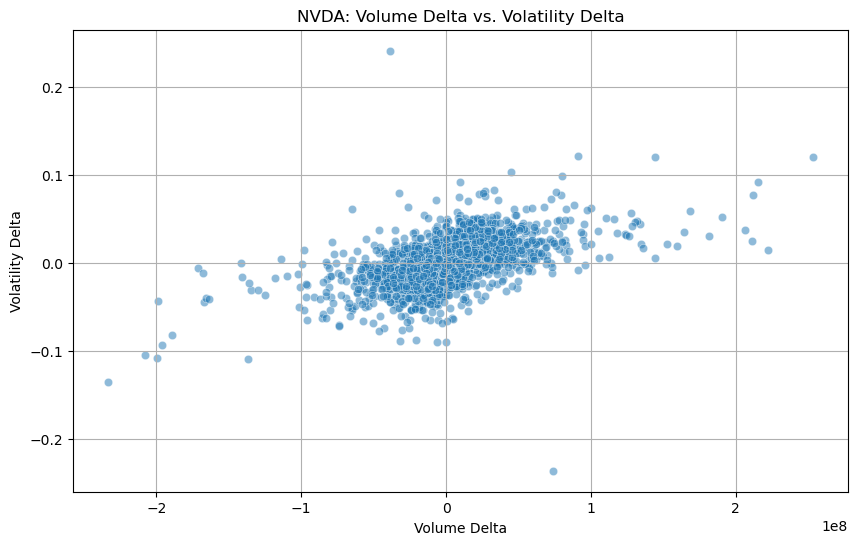

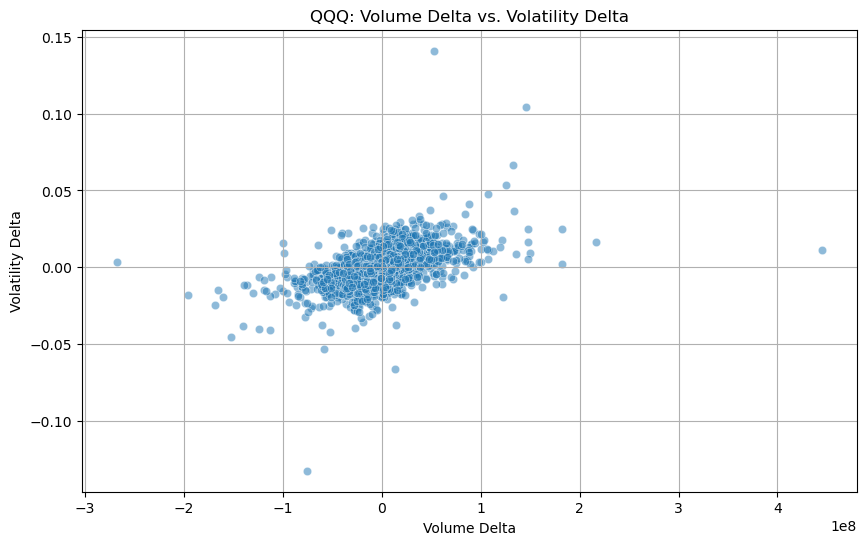

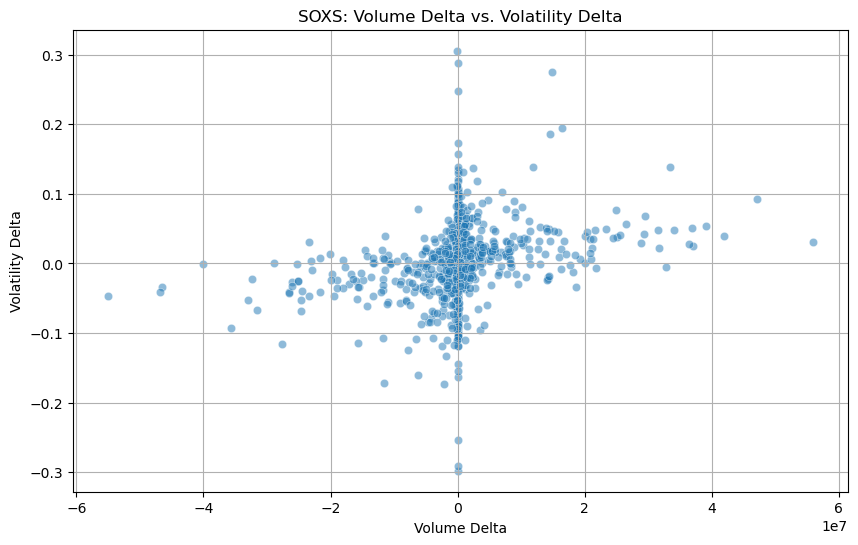

In [43]:
def plot_data(data, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Volume_delta', y='Volatility_delta', data=data, alpha=0.5)
    plt.title(f'{title}: Volume Delta vs. Volatility Delta')
    plt.xlabel('Volume Delta')
    plt.ylabel('Volatility Delta')
    plt.grid(True)
    plt.show()

plot_data(nvda_data, 'NVDA')
plot_data(qqq_data, 'QQQ')
plot_data(soxs_data, 'SOXS')


In [45]:
def linear_model(x, a, b):
    return a * x + b

def fit_model(data):
    x_data = data['Volume_delta'].dropna()
    y_data = data['Volatility_delta'].dropna()
    
    if len(x_data) < 2:
        print("Not enough data for fitting.")
        return None

    popt, _ = curve_fit(linear_model, x_data, y_data)
    return popt

nvda_params = fit_model(nvda_data)
qqq_params = fit_model(qqq_data)
soxs_params = fit_model(soxs_data)

In [46]:
print("NVDA Parameters (a, b):", nvda_params)

NVDA Parameters (a, b): [ 3.87431443e-10 -7.12533561e-06]


In [47]:
print("QQQ Parameters (a, b):", qqq_params)

QQQ Parameters (a, b): [ 1.72520702e-10 -9.52557386e-07]


In [48]:

print("SOXS Parameters (a, b):", soxs_params)

SOXS Parameters (a, b): [ 1.63983593e-09 -3.08752359e-05]


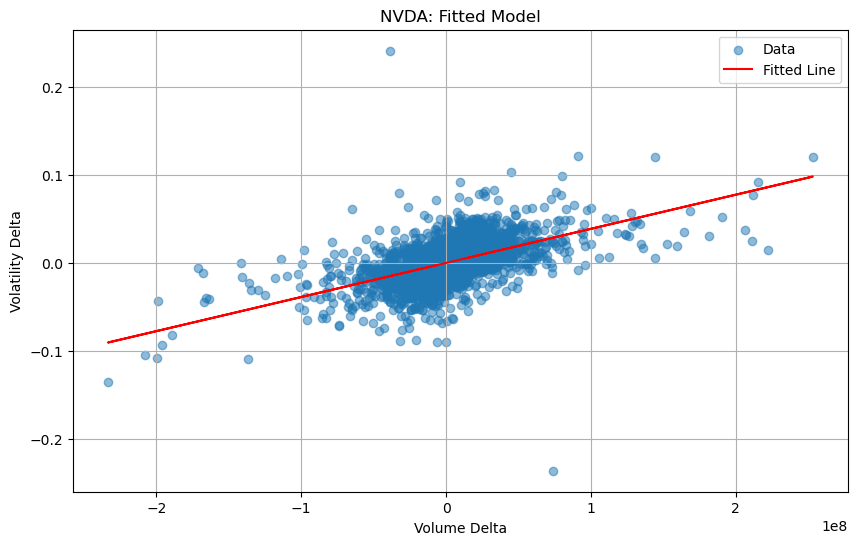

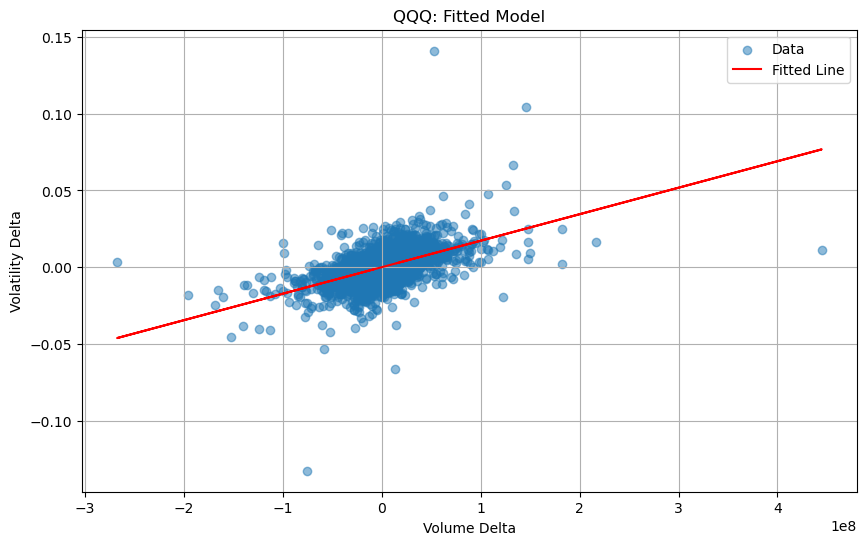

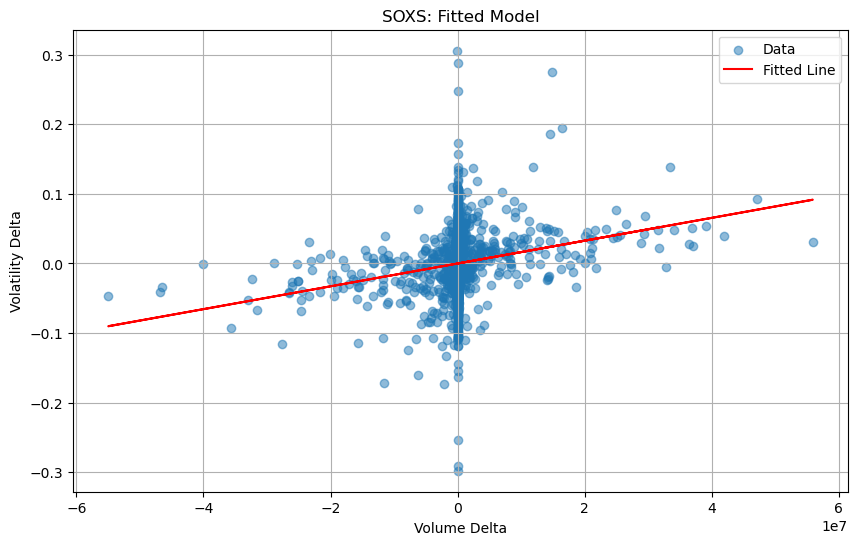

In [49]:
def plot_fit(data, params, title):
    plt.figure(figsize=(10, 6))
    x_data = data['Volume_delta'].dropna()
    y_data = data['Volatility_delta'].dropna()
    plt.scatter(x_data, y_data, label='Data', alpha=0.5)
    plt.plot(x_data, linear_model(x_data, *params), color='red', label='Fitted Line')
    plt.title(f'{title}: Fitted Model')
    plt.xlabel('Volume Delta')
    plt.ylabel('Volatility Delta')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_fit(nvda_data, nvda_params, 'NVDA')
plot_fit(qqq_data, qqq_params, 'QQQ')
plot_fit(soxs_data, soxs_params, 'SOXS')


In [54]:
# Check the data types of the 'Vol.' column to identify the issue
spy_data['Vol.'].head(), iwm_data['Vol.'].head(), vti_data['Vol.'].head()


(0    39.48
 1    38.22
 2    45.67
 3    60.18
 4    41.44
 Name: Vol., dtype: float64,
 0    21.95
 1    23.96
 2    24.97
 3    23.24
 4    20.94
 Name: Vol., dtype: float64,
 0    3.38
 1    2.26
 2    2.87
 3    3.12
 4    3.98
 Name: Vol., dtype: float64)

In [58]:
# Adjusted model fitting function to handle missing values and ensure aligned data
def fit_model(data):
    data = data[['Volume_delta', 'Volatility_delta']].dropna()
    if len(data) < 2:
        print("Not enough data for fitting.")
        return None

    x_data = data['Volume_delta'].values
    y_data = data['Volatility_delta'].values

    # Fit using curve_fit
    popt, _ = curve_fit(linear_model, x_data, y_data)
    return popt

# Fit the model again
spy_params = fit_model(spy_data)
iwm_params = fit_model(iwm_data)
vti_params = fit_model(vti_data)

spy_params, iwm_params, vti_params


(array([9.31613210e-05, 8.86821255e-07]),
 array([2.69967727e-04, 7.60962358e-08]),
 array([ 0.00187381, -0.00013059]))

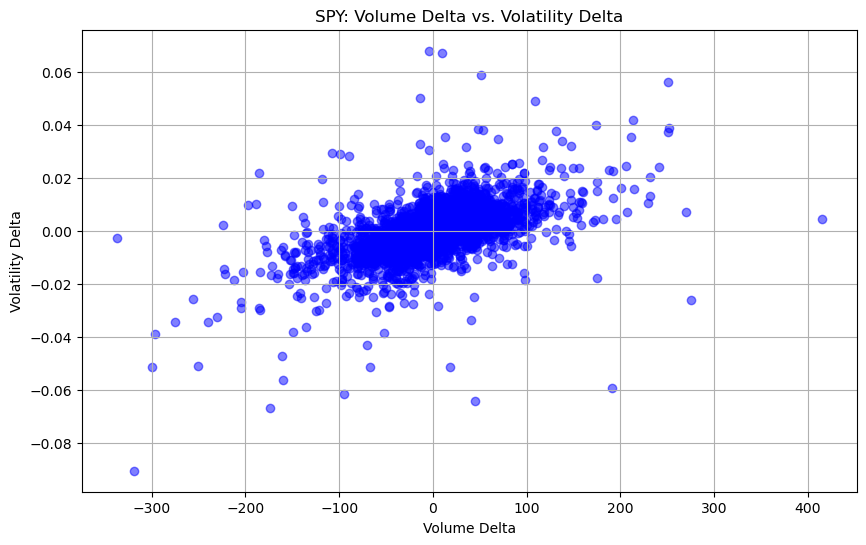

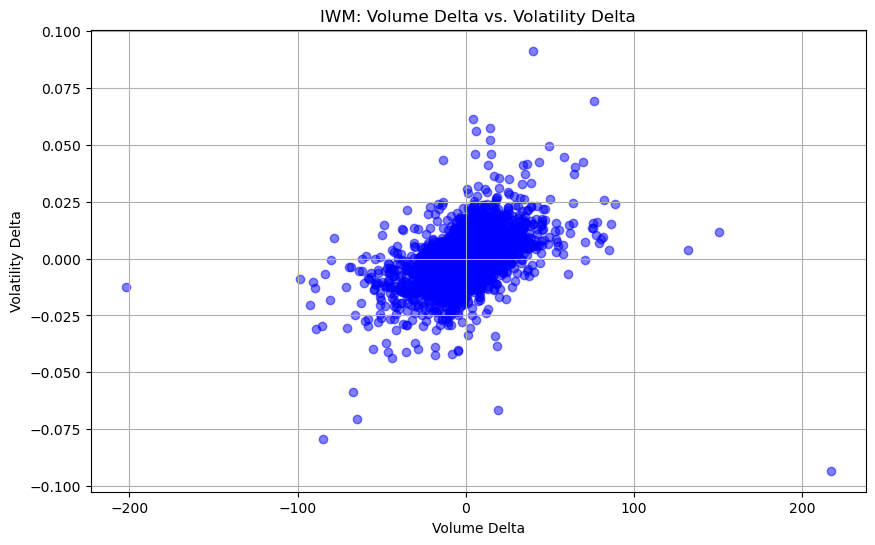

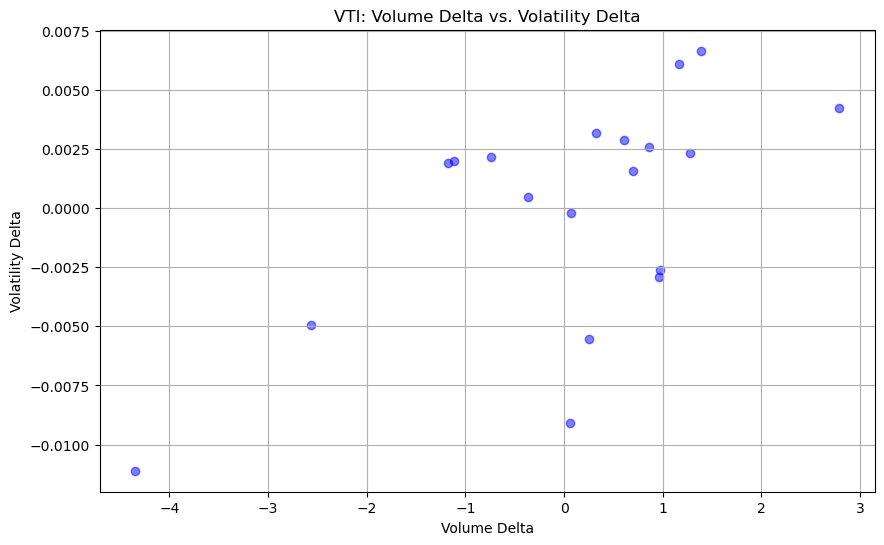

In [59]:
# Visualization function for Volume Delta vs Volatility Delta
def plot_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Volume_delta'], data['Volatility_delta'], alpha=0.5, color='blue')
    plt.title(f'{title}: Volume Delta vs. Volatility Delta')
    plt.xlabel('Volume Delta')
    plt.ylabel('Volatility Delta')
    plt.grid(True)
    plt.show()

# Plot for SPY, IWM, and VTI
plot_data(spy_data, 'SPY')
plot_data(iwm_data, 'IWM')
plot_data(vti_data, 'VTI')


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the PFE data
pfe_data = pd.read_csv(r'C:\Users\janvi\Desktop\assessment\PFE.csv')

# Display the first few rows to understand the structure
pfe_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,0.000000,0.815346,0.802993,0.815346,0.171287,2458771
1,1972-06-02,0.815346,0.817817,0.802993,0.805463,0.169211,1613885
2,1972-06-05,0.805463,0.807934,0.798051,0.802993,0.168692,2585251
3,1972-06-06,0.802993,0.825229,0.800522,0.820288,0.172325,2347469
4,1972-06-07,0.820288,0.820288,0.807934,0.820288,0.172325,1032077


In [61]:
# Function to calculate intraday volatility and volume delta
def calculate_volatility_and_delta(data):
    data['Volatility'] = (data['High'] - data['Low']) / data['Close']
    data['Volume_delta'] = data['Volume'].diff()
    data['Volatility_delta'] = data['Volatility'].diff()
    return data

# Apply the function to the PFE data
pfe_data = calculate_volatility_and_delta(pfe_data)
pfe_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_delta,Volatility_delta
0,1972-06-01,0.000000,0.815346,0.802993,0.815346,0.171287,2458771,0.015151,NaN,NaN
1,1972-06-02,0.815346,0.817817,0.802993,0.805463,0.169211,1613885,0.018404,-844886.0,0.003254
2,1972-06-05,0.805463,0.807934,0.798051,0.802993,0.168692,2585251,0.012308,971366.0,-0.006097
3,1972-06-06,0.802993,0.825229,0.800522,0.820288,0.172325,2347469,0.030120,-237782.0,0.017812
4,1972-06-07,0.820288,0.820288,0.807934,0.820288,0.172325,1032077,0.015061,-1315392.0,-0.015059


In [62]:
# Define a linear model: Volatility_delta = a * Volume_delta + b
def linear_model(x, a, b):
    return a * x + b

# Fit the model to the data
def fit_model(data):
    x_data = data['Volume_delta'].dropna()
    y_data = data['Volatility_delta'].dropna()

    # Ensure equal length of data
    min_length = min(len(x_data), len(y_data))
    x_data = x_data[:min_length]
    y_data = y_data[:min_length]

    # Fit the curve
    popt, _ = curve_fit(linear_model, x_data, y_data)
    return popt

# Fit the model for PFE
pfe_params = fit_model(pfe_data)

# Display results
pfe_params


array([ 4.28463272e-10, -1.00958987e-06])

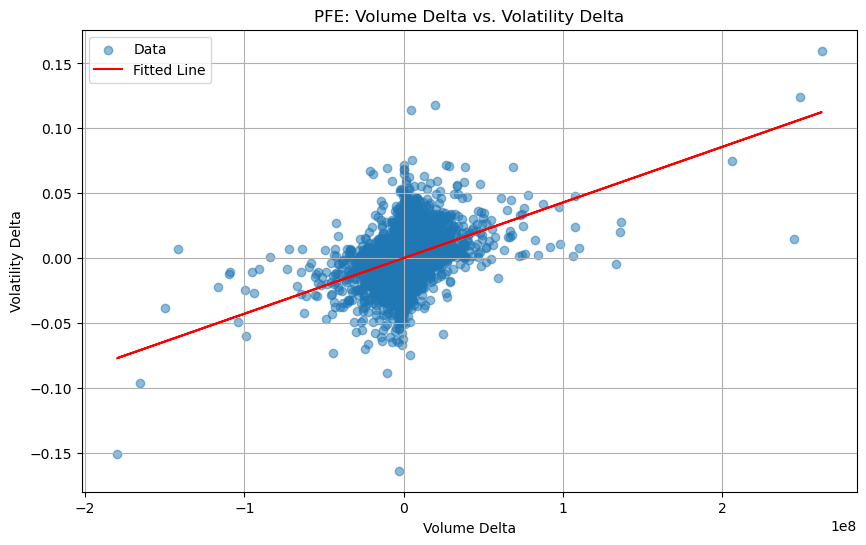

In [63]:
# Plot Volume Delta vs. Volatility Delta with the fitted line
def plot_with_fit(data, params, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Volume_delta'], data['Volatility_delta'], alpha=0.5, label='Data')
    
    # Plot the fitted line
    x_data = data['Volume_delta'].dropna()
    fitted_line = linear_model(x_data, *params)
    plt.plot(x_data, fitted_line, color='red', label='Fitted Line')

    plt.title(f'{title}: Volume Delta vs. Volatility Delta')
    plt.xlabel('Volume Delta')
    plt.ylabel('Volatility Delta')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for PFE
plot_with_fit(pfe_data, pfe_params, 'PFE')


In [64]:
from sklearn.metrics import r2_score

# Predict the Volatility Delta using the fitted model
x_data = pfe_data['Volume_delta'].dropna()
y_data = pfe_data['Volatility_delta'].dropna()

# Ensure equal length of data
min_length = min(len(x_data), len(y_data))
x_data = x_data[:min_length]
y_data = y_data[:min_length]

# Get predictions from the model
y_pred = linear_model(x_data, *pfe_params)

# Calculate R-squared value
r_squared = r2_score(y_data, y_pred)
r_squared


0.13518786597665378

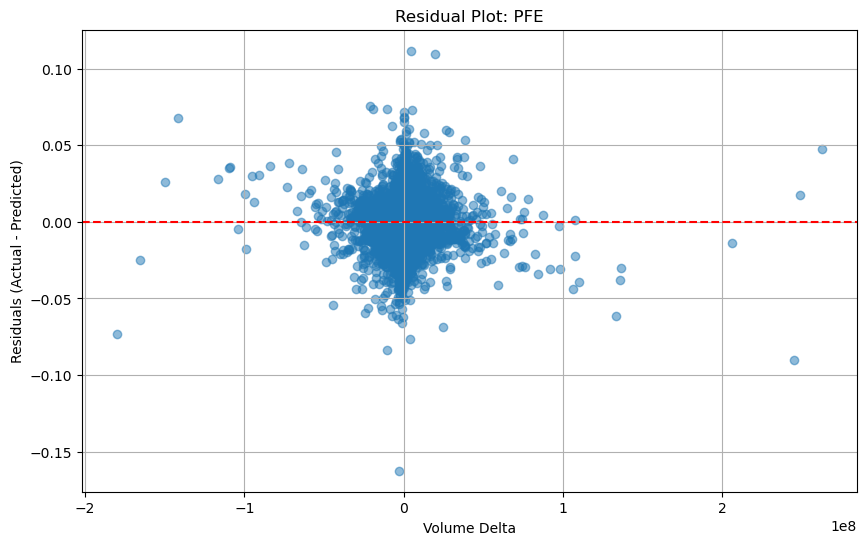

In [65]:
# Plot residuals to visualize the error distribution
residuals = y_data - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(x_data, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: PFE')
plt.xlabel('Volume Delta')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


In [66]:
# Define the polynomial model
def polynomial_model(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the model using curve_fit
popt_poly, _ = curve_fit(polynomial_model, x_data, y_data)

# Calculate predictions and R-squared for the polynomial model
y_pred_poly = polynomial_model(x_data, *popt_poly)
r_squared_poly = r2_score(y_data, y_pred_poly)

popt_poly, r_squared_poly


(array([-2.54143803e-19,  4.36469314e-10,  3.21850109e-05]), 0.135745039373957)

In [67]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import numpy as np

# Define the polynomial model
def polynomial_model(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the model using curve_fit
popt_poly, _ = curve_fit(polynomial_model, x_data, y_data)

# Calculate predictions
y_pred_poly = polynomial_model(x_data, *popt_poly)

# Calculate R-squared for polynomial model
r_squared_poly = r2_score(y_data, y_pred_poly)

print("Polynomial Model Coefficients:", popt_poly)
print("R-squared for Polynomial Model:", r_squared_poly)


Polynomial Model Coefficients: [-2.54143803e-19  4.36469314e-10  3.21850109e-05]
R-squared for Polynomial Model: 0.135745039373957


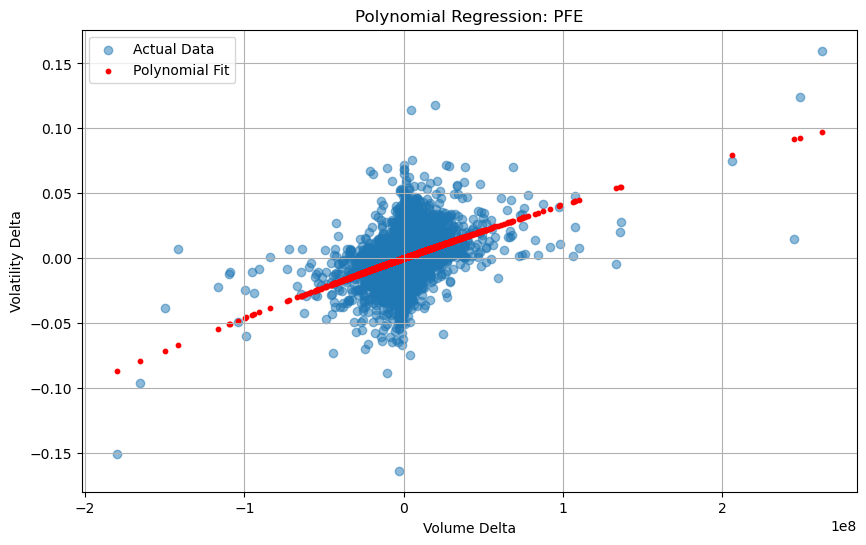

In [68]:
import matplotlib.pyplot as plt

# Plot the data and model
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.5, label='Actual Data')
plt.scatter(x_data, y_pred_poly, color='red', s=10, label='Polynomial Fit')
plt.title('Polynomial Regression: PFE')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.legend()
plt.grid(True)
plt.show()
